## Variation of origin-test-reader

In [109]:
#!/usr/bin/env python

import sys
import os
import random
import time
import zmq
import json
import numpy
import matplotlib.pyplot as plt
import math

# first find ourself
fullBinPath  = os.path.abspath(os.getcwd() + "/" + sys.argv[0])
fullBasePath = os.path.dirname(os.path.dirname(fullBinPath))
fullLibPath  = os.path.join(fullBasePath, "lib")
fullLibPath='C:\Users\Rb\LabSoftware\Origin\lib'
fullCfgPath  = os.path.join(fullBasePath, "config")
fullCfgPath='C:\Users\Rb\LabSoftware\Origin\config'
sys.path.append(fullLibPath)
print fullLibPath
from origin.client import server, random_data

if len(sys.argv) > 1:
  if sys.argv[1] == 'test':
    configfile = os.path.join(fullCfgPath, "origin-server-test.cfg")
  else:
    configfile = os.path.join(fullCfgPath, sys.argv[1])
else:
  configfile = os.path.join(fullCfgPath, "origin-server.cfg")

import ConfigParser
config = ConfigParser.ConfigParser()
config.read(configfile)

context = zmq.Context()
socket = context.socket(zmq.REQ)
#host = config.get('Server','ip')
host='hexlabmonitor.physics.wisc.edu'

#port = config.getint('Server','read_port')
port=5561
socket.connect("tcp://%s:%s" % (host,port))

#stream_test_list = ['ULETrans960']
stream_test_list = ['Rb_CoilThermistor']
starttime=1501023600 # 2017/07/25 22:00
stoptime=1501063200 # 2017/07/26 10:00

C:\Users\Rb\LabSoftware\Origin\lib


In [110]:
for stream in stream_test_list:
    print "sending raw read request for stream `{}`....".format(stream)
    request_obj = { 'start':starttime, 'stop':stoptime,'stream': stream, 'raw': True }
    socket.send(json.dumps(request_obj))
    response = socket.recv()
    print "Data received"        

sending raw read request for stream `Rb_CoilThermistor`....
Data received


In [111]:
dict=json.loads(response)
indicator=dict[0]
truedata=dict[1]

In [128]:
float(max(truedata['measurement_time']))/2**32

1501063199.351734

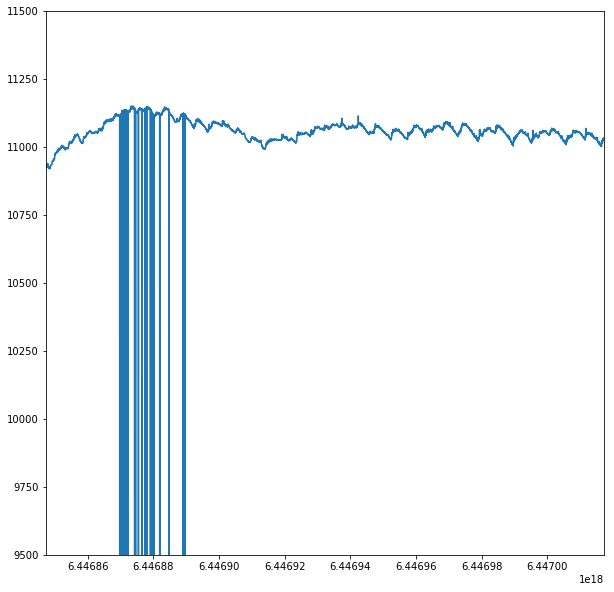

In [112]:
fig=plt.figure(figsize=(10,10))
plt.plot(truedata['measurement_time'],truedata['thermistor'])
plt.axis([min(truedata['measurement_time']),max(truedata['measurement_time']),9500,11500])
plt.show()
#truedata['measurement_time']

In [129]:
def RtoT(R):
    # Coefficients
    [A,B,C]=[0.001125308852122, 0.000234711863267,0.000000085663516]
    oneoverT=A+B*math.log(R)+C*math.pow(math.log(R),3)
    T=1.0/oneoverT-273.15
    return T

def dataconditioning(x):
    if x<10:
        return x*10000.0
    else:
        return x

def to32bit(timestamp):
    return float(timestamp)/2**32

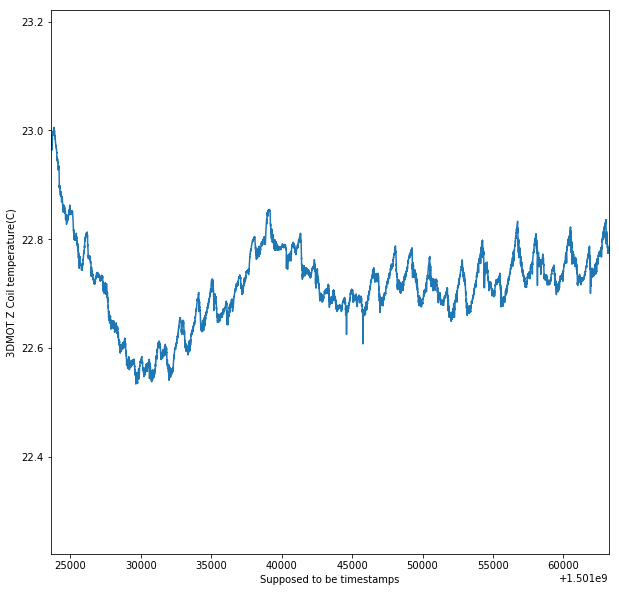

In [130]:
fig=plt.figure(figsize=(10,10))
Tdata=map(RtoT,map(dataconditioning,truedata['thermistor']))
timedata=map(to32bit,truedata['measurement_time'])
plt.plot(timedata,Tdata)
plt.axis([min(timedata),max(timedata),numpy.median(Tdata)-0.5,numpy.median(Tdata)+0.5])
plt.ylabel('3DMOT Z Coil temperature(C)')
plt.xlabel('Supposed to be timestamps')
plt.show()

In [126]:
(stoptime-starttime)/3600

11